# Testing the Pipeline

In [1]:
import numpy as np

## API request to get img

Return the img as a 4D array

In [14]:
import os
from Utils.read_coord import kml_coord
from Utils.sentinal_request import senti_api
from Utils.forest_cover import get_cover

file_path = input('Enter kml file path: ')
print(file_path)

if os.path.exists(file_path):
    print('The file exists')

    with open(file_path, 'r', encoding='utf-8-sig') as f:
        lines = f.readlines()

        #print(lines)
else:
    print('The specified file does NOT exist')
    
poly_coord = kml_coord(file_path)
print(poly_coord)

img,resol = senti_api(poly_coord)
print(resol)
#print(img)

Enter kml file path: C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\Hong Kong.kml
C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\Hong Kong.kml
The file exists
[[114.11390205  22.27660908]
 [114.13349276  22.24813719]
 [114.14182051  22.24596384]
 [114.16065688  22.22754671]
 [114.16735362  22.22922495]
 [114.1774882   22.22839118]
 [114.17748652  22.23643119]
 [114.18635543  22.22638381]
 [114.19594669  22.21851355]
 [114.19323345  22.21248256]
 [114.1963102   22.20544775]
 [114.21096432  22.21416133]
 [114.20897534  22.1969072 ]
 [114.21349825  22.19204991]
 [114.22616214  22.19255606]
 [114.22616132  22.19875433]
 [114.22435028  22.21215501]
 [114.22434941  22.21818523]
 [114.21910206  22.21985906]
 [114.22344337  22.22773252]
 [114.23194759  22.22706411]
 [114.24190038  22.20311254]
 [114.26324756  22.20261067]
 [114.26379053  22.20797086]
 [114.25782052  22.21517407]
 [114.25601145  22.22371638]
 [114.2614392   22.22287846]
 [11

In [15]:
img.shape

(1124, 1567, 4)

In [16]:
img[40][30]

array([0., 0., 0., 0.], dtype=float32)

## Land area calculation function

In [14]:
def land_area(req,res):
    bb = req[:,:,0]
    r, c = bb.shape
    
    for i in range(0,r-1):
        for j in range(0,c-1):
            if bb[i][j] > 0.0:
                bb[i][j] = 0
            else:
                bb[i][j] = 1
            
    bb_list = bb.tolist()
    bg_pixel = sum(x.count(1) for x in bb_list)
    land_pixel = (r*c)-bg_pixel
    land_area = np.round((land_pixel*res*res)/1000000,2) # in km2
    print("Land Area",land_area, "km2")
    
    return land_area

In [15]:
total_area = land_area(img,resol)

Land Area 0.28 km2


## Get the forest cover

In [17]:
forest_area,forest_cover = get_cover(img,resol)

Total Land Area 103.52 km2
Forest/ Green area:  54.3154 km2
Forest/green cover:  52.47 %


## NDVI plot

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from Utils.vegetation_indices import normalized_diff
import earthpy.plot as ep

In [18]:
red = img[:, :, 2]
nir = img[:, :, 3]
ndvi = normalized_diff(nir,red)

In [19]:
def ndvi_plot(ndvi,thresh = 0.6):
    
    '''
    ndvi: ndvi index values
    save_path: file path to save the classified image
    file: original file name
    '''
    
    # Create classes and apply to NDVI results
    ndvi_class_bins = [-np.inf, thresh, np.inf]
    ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

    # Apply the nodata mask to the newly classified NDVI data
    ndvi_landsat_class = np.ma.masked_where(np.ma.getmask(ndvi), 
                                            ndvi_landsat_class)
    #np.unique(ndvi_landsat_class)
    
    # Define color map
    nbr_colors = ["gray", "g"]
    nbr_cmap = ListedColormap(nbr_colors)

    # Define class names
    ndvi_cat_names = [
        "No Vegetation",
        "Vegetation"]

    # Get list of classes
    classes = np.unique(ndvi_landsat_class)
    classes = classes.tolist()
    
    # The mask returns a value of none in the classes. remove that
    classes = classes[0:2]

    # Plot your data
    fig, ax = plt.subplots()
    im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
    ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
    ax.set_axis_off()

    return

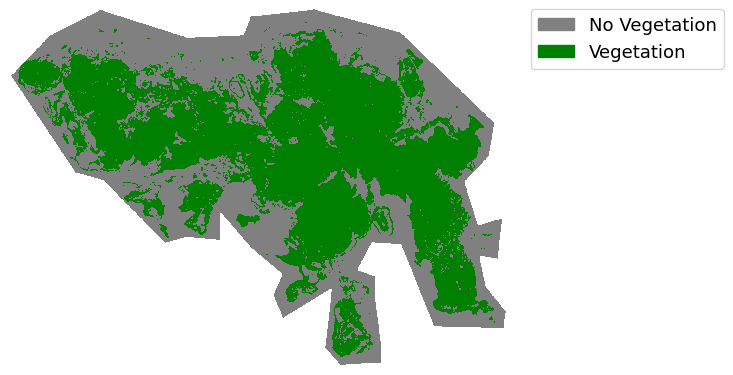

In [20]:
ndvi_plot(ndvi)